# Продвинутый Python, семинар 7

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Коган Александра, Романченко Полина

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

Сегодняшний семинар - это некоторый recap тех частей, которые мы не успели пройти в прошлые разы (если все успеваем, то еще попрактикуем регулярки!)

# Вспоминаем былое

## Docker

### Но... зачем?

Теперь мы перешли к самой сложной части - про докер.

Что такое докер? Представьте себе ситуацию: у вас есть приложение, которое вы хотите запустить и показать всему миру, какие вы классные. Что делать?

Можно, конечно, создать виртуалку, на нее накинуть приложение и там все делать. Но в какой-то момент вам придется класть туда несколько приложений и дальше начинается катавасия с загруженностью процесса. В какой-то момент одно приложение может стрельнуть (например, если у вас отдельное приложение для новостей, куда зайдет сразу дофига людей), сожрет все процессы и остальные части будут страдать. А еще же люди заходят с разными ОС, и надо конфигурации разные иметь, чтобы у всех все работало. Вот для этих вещей и есть контейнеры

Что такое контейнер? Это способ стандартизации развертки приложения и отделения его от общей инфраструктуры. Экземпляр приложения запускается в изолированной среде, не влияющей на основную операционную систему


![](https://d1.awsstatic.com/Developer%20Marketing/containers/monolith_2-VM-vs-Containers.78f841efba175556d82f64d1779eb8b725de398d.png)

Контейнер позволяют:

1. упаковать в единый образ приложение и все его зависимости: библиотеки, системные утилиты и файлы настройки. Это упрощает перенос приложения на другую инфраструктуру

2. приложения работают только внутри контейнеров и не имеют доступа к основной операционной системе. Это повышает безопасность приложений:они не смогут случайно или умышленно навредить основной системе. Если приложение в контейнере завершится с ошибкой или зависнет, это никак не затронет основную ОС (изоляция ресурсов)

3. избавляет от зависимости ОС: достаточно добавить необходимую конфигурацию в контейнер вместо процесса эмулирования одной ОС на другой (что трудозатратно)

4. За счет оптимизации контейнеров получаем также меньшую загрузку

### Ну что же, начнем

Первое, что надо сделать - это загрузить образ из Docker Hub. Образ (Image) - это схема нашего приложения, основа контейнера, с помощью которого его можно запустить. Все возможные образы хранятся [здесь](https://hub.docker.com/search?q=&type=image) (можно будет добавить сюда же и свои образы, которые вам необходимы)

Загрузим самый простой образ - busybox (дальше будет работа в терминале, а не в Колабе)

In [ ]:
docker pull busybox # загрузи образ busybox, если Permission denied, то запустите с sudo
docker images # посмотреть на все загруженные образы
docker rmi busybox # удалить образ

Отлично, загрузили, давайте запускать!

In [ ]:
docker run busybox # ничего не случилось, потому что мы ничего и не задали
docker run busybox echo "Hello" # о, что-то выдал
docker ps # посмотреть запущенные контейнеры (их пока нет, потому что прошлые кончились)
docker ps -a # посмотреть все контейнеры
docker run -it busybox sh #запустить на больше, чем 1 команду (-it - флаг интерактива)

Все запушенные и кончившиеся контейнеры занимают место, поэтому их еще стоит удалять (как минимум те, которые завершили свое действие)

In [ ]:
docker rm <ids> # удалить все ненужные контейнеры
docker rm $(docker ps -a -q -f status=exited) # чтобы не копировать все id
# -a все контейнеры, -q  - вывести только ID, -f - фильтр (на статус закончившися exited)

Обратите внимание сверху на значок Docker (MacOS). Видим, что Docker работает. Что это значит? Что у нас запушен процесс, с помощью которого это все вообще происходит (так называемый Docker Daemon)

### Запустим сайт из под капота

Окей, повеселились с каким-то образом. Как приложения-то запускать? Давайте попробуем запустить какой-нибудь более интересный образ

In [ ]:
docker pull prakhar1989/static-site
docker run prakhar1989/static-site #ничего не происходит, видим просто что is running
docker stop $(docker ps -a -q -f status=running) #выключаем все активные контейнеры
docker run -d -P --name static-site prakhar1989/static-site #давайте сделаем так:
# -d - открепляем наш терминал от контейнера(не будет прикреплен, можем продолжить работу в терминале)
# -P - сделаем порты открытыми и публичными, чтобы подключиться
# --name переименуем для удоства в static-site
docker port static-site #смотрим на порты, открываем на localhost:<порт>

Ура, запустили простенький сайт! А если поменять порт? Можно

In [ ]:
docker run -d -P -p 8888:80 prakhar1989/static-site --name static-site prakhar1989/static-site #теперь он на порту 8888
# окей, остановим все и удалим

### Хотим быть крутыми со своим образом!

Теперь хотим создать свой собственный образ и сделать еще интереснее. Образы делятся на 2 типа:

* Официальные образы - поддерживаются командой docker, скачать можно по названию (например, docker pull python)

* Неофициальные образы - образ, созданный пользователем, чаще всего выглядит как user/name

Скачаем простенький сайт, сделанный на Flask (о нем мы будет говорить в других семинарах) и запустим его локально

In [ ]:
git clone https://github.com/prakhar1989/docker-curriculum.git #скачаем для простого приложения на Flask (о нем мы будет говорить в других семинарах)
cd docker-curriculum/flask-app; pip install -r requirements.txt #установим все, что нужно для сайта
vim app.py #для того, чтобы у меня запустилась, так как порт 5000 у меня занят, я поменял в коде на 8888
python app.py

Получилось! Теперь создадим образ с этим приложением. Что нужно?

Так как сайт написан на Python, то надо скачать базовый образ python

In [ ]:
docker pull python:3-onbuild #Какой onbuild, це шо? Это надстройка при запуске возьмет на requirements.txt и установит за нас все, что нужно
# То есть такой помощник при запуске

Теперь надо как-то соединить приложение и образ. Это делается с помощью DockerFile - текстовый документ для автоматизации сборки (код для DockerFile почти идентичен аналогам bash)

Создаем там же, где и наше приложение файл Dockerfile и прописываем:

In [ ]:
vim Dockerfile

In [ ]:
FROM python:3-onbuild #указываем образ, который надо использовать

#благодаря тому, что у нас onbuild, нам не надо копировать файлы и устанавливать зависимости здесь

EXPOSE 8888 #говорим, на какой порт это все отправлять

CMD ["python", "./app.py"] # команды для запуска (то есть что надо сделать)

Осталось собрать образ через docker build:

In [ ]:
docker build -t palladain7/catgif . #здесь надо зарегаться на Docker Hub (это быстро) и в качестве user ввести свой ник
docker run -p 8888:8888 palladain/catgif #собрали-запустили
docker images #проверяем образ

Ура, мы собрали образ докера! Теперь осталось его загрузить на Docker Hub, чтобы его могли увидеть все и использовать)

In [ ]:
docker login #вначале надо авторизоваться
docker push palladain7/catgif #пушим
https://hub.docker.com/r/palladain7/catgif/ - проверяем, успех

### Задание 3


Проделать весь этот путь от создания и до публикации собственного образа

## А теперь со всей этой информации можно уже и бота загрузить на docker!

### Делаем бота сильным и независимым

In [ ]:
%%writefile bot.py

from random import seed, randrange
from time import time
import telebot
from telebot import types

TOKEN = '5674479560:AAHI0lWyLHZQUa91Di-6NmNqdWbE7lL_6H8' # указываем токен нашего бота (для этого надо создать бота в @BotFather)
# Создайте собственного бота, чтобы наши наработки друг друга не перебивали

bot = telebot.TeleBot(TOKEN) # инициализируем нашего бота

parrots = {1: 'https://cindygurmann.files.wordpress.com/2018/06/ea2530ad-e913-4d5b-8036-762b5b227c04.jpeg',
           2: 'https://cherepah.ru/wp-content/uploads/2/2/8/228937ec782b8755993a3241e1d6c039.jpeg',
           3: 'https://kotsobaka.com/wp-content/uploads/2018/08/2748131046_8a253489b5_b.jpg',
           4: 'https://bestpopugai.ru/wp-content/uploads/2022/05/1-5.jpg',
           5: 'https://i.artfile.ru/1920x1200_952300_[www.ArtFile.ru].jpg',
           6: 'https://kipmu.ru/wp-content/uploads/pchppgks.jpg'}

favourite_parrot = 'https://pet7.ru/wp-content/uploads/2017/09/Popugaj-zhako-osobennosti-vida.jpg'

parrot_gif = 'https://i1.wp.com/cdn.dribbble.com/users/104127/screenshots/2589080/parrots.gif'

@bot.message_handler(commands=['start'])
def hello_message(message):
    markup = types.ReplyKeyboardMarkup(resize_keyboard=True, row_width=2) # указываем, сколько кнопок может быть в строке
    item_1 = types.KeyboardButton("Любимый попугай")
    item_2 = types.KeyboardButton("🎲")
    markup.add(item_1, item_2) #добавляем
    bot.send_message(message.chat.id, "Привет, тут будут попугаи!", reply_markup=markup)

@bot.message_handler(content_types=['text', 'emoji'])
def message_reply(message):
    if message.text=="Любимый попугай":
        markup = types.ReplyKeyboardMarkup()
        item = types.KeyboardButton(text='Хочу GIF-ку!')
        markup.add(item)
        bot.send_photo(message.chat.id, favourite_parrot, reply_markup = markup)
    elif message.text == "🎲":
        r = bot.send_dice(message.chat.id)
        bot.send_photo(message.chat.id, parrots[r.dice.value])
    elif message.text == 'Хочу GIF-ку!':
        markup = types.InlineKeyboardMarkup()
        item = types.InlineKeyboardButton(text='Ссылка', url=parrot_gif)
        item_1 = types.InlineKeyboardButton(text='Переслать', switch_inline_query=parrot_gif)
        markup.add(item, item_1)
        bot.send_animation(message.chat.id, parrot_gif, reply_markup = markup)
        markup = types.ReplyKeyboardMarkup(resize_keyboard=True, row_width=2) # указываем, сколько кнопок может быть в строке
        item_1 = types.KeyboardButton("Любимый попугай")
        item_2 = types.KeyboardButton("🎲")
        markup.add(item_1, item_2) #добавляем
        bot.send_message(message.chat.id, "Еще попуги!", reply_markup = markup)

@bot.inline_handler(func=lambda query: len(query.query) > 0)
def query_text(query):
    try:
        seed(int(time()))
        size = randrange(1, 100)
        print(size)
        r_sum = types.InlineQueryResultArticle(
                id='1', title="Папуг!",
                input_message_content = types.InputTextMessageContent(message_text="Ваш папуг " + str(size) + " размера" )
        )
        bot.answer_inline_query(query.id, [r_sum])
    except Exception as e:
        print("{!s}\n{!s}".format(type(e), str(e)))

bot.polling(none_stop=True, interval=0) #запускаем нашего бота

Writing bot.py


Вспоминаем, как работать с докером:

In [ ]:
docker pull python:3-onbuild

vim Dockerfile

In [ ]:
FROM python:3-onbuild #указываем образ, который надо использовать

#благодаря тому, что у нас onbuild, нам не надо копировать файлы и устанавливать зависимости здесь

EXPOSE 8888 #говорим, на какой порт это все отправлять

CMD ["python", "bot.py"] # команды для запуска (то есть что надо сделать)

In [ ]:
docker build -t palladain7/catgif . #здесь надо зарегаться на Docker Hub (это быстро) и в качестве user ввести свой ник
docker run -d -P -p 8888:8888 palladain/catgif #собрали-запустили
docker images #проверяем образ

## Git

Теперь поговорим про Git. Это вещь, с которой вам придется работать, если вы пользуетесь Guthub/Bitbucket/GitLab (ну или с их аналогами типа Аркадии)

В первую очередь git нужен для совместной работы (так разные люди могут делать разные части) и чтобы люди видели, кто какую часть изменил, из-за кого все упало (ну или наоборот стало лучше, тут как повезет)



###Начнем с основы, так сказать, базы

Первое, что мы хотим сделать - это создать репозиторий или скачать его откуда-нибудь.

Для этого мы делаем:

1. Для того, чтобы создать наш репозиторий, внутри папки, где хотим хранить

```
    git init
```

2. Для того, чтобы скачать репозиторий, делаем просто

```
    git clone <url> <dir>
    <dir> - опциональный аргумент, если хотите, чтобы папка по-другому называлась
```

In [ ]:
!mkdir Deep_Python; cd Deep_Python; ls

In [ ]:
!cd Deep_Python; ls; git init

In [ ]:
!git clone https://github.com/Palladain/Deep_Python.git True_Python

In [ ]:
!ls; cd True_Python; ls -la

Отлично, а что теперь делать? Теперь давайте разберемся, что происходит под капотом и как с этим нам жить

Для начала, как хранится репозиторий. Репозиторий - это набор снэпшотов:

![snapshots](https://git-scm.com/book/en/v2/images/snapshots.png)

Если мы изменили файл, то при снэпшоте запоминаем, что там было. Если не было изменений - то просто делаем ссылку на файл в предыдущем снэпшоте (иначе дорого по памяти)

Любой файл имеет 3 состояния:

![states](https://git-scm.com/book/en/v2/images/lifecycle.png)

Разберемся с каждым по отдельности:

* Untracked - файла до этого не было, мы его создали

* Unmodified - в последней версии он был, но мы его никак не меняли

* Modified - в последней версии он был, но мы его изменили

Для того, чтобы сохранить изменения (сделать снэпшот репозитория), необходимо добавить все эти изменения в новую версию перед тем, как сделать снэпшот (иными словами, показать, что надо сохранить новую версию)

Благо, что можно посмотреть, что мы меняли и что стоит добавить:

In [ ]:
!cd Deep_Python; git status

Добавим новый файл:

In [ ]:
!cd Deep_Python; echo "Hello world!" >> Hello.txt; git status

Ага, значит надо добавить. Изменяем (если надо) с помощью

```
 git add
 git rm - удалить 
 git mv - перенести (если расширение поменяли, например)
```

In [ ]:
!cd Deep_Python; git add Hello.txt; git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   Hello.txt



Можно также смотреть изменения по файлам (что поменяли по сравнению с текущей версией):

In [ ]:
!cd Deep_Python; echo "ahah" >> Hello.txt
!cd Deep_Python; git diff; git add Hello.txt
!cd Deep_Python; git diff --staged ##сравним изменения просто с последним коммитом (на данный момент с пустотой)

diff --git a/Hello.txt b/Hello.txt
index cd08755..b6b4373 100644
--- a/Hello.txt
+++ b/Hello.txt
@@ -1 +1,2 @@
 Hello world!
+ahah
diff --git a/Hello.txt b/Hello.txt
new file mode 100644
index 0000000..b6b4373
--- /dev/null
+++ b/Hello.txt
@@ -0,0 +1,2 @@
+Hello world!
+ahah


### Делаем коммиты

Ура, можем делать коммит! Делается просто и незатейливо с помощью комманды

```
git commit
```

In [ ]:
!cd Deep_Python; git config user.email "you@example.com"
!cd Deep_Python; git config user.name "Your Name"
!cd Deep_Python; git commit -m "First version" ##-m - добавить сообщения к коммиту

[master (root-commit) 6bf4ac9] First version
 1 file changed, 2 insertions(+)
 create mode 100644 Hello.txt


Но люди не идиоты, чтобы постоянно руками все добавлять, верно ведь? Для этого есть в commit флаг -a (добавь все изменения, но только для tracked файлов)

In [ ]:
!cd Deep_Python; echo "New_version" >> Hello.txt
!cd Deep_Python; git commit -a -m "Second version"

[master 6ca26ba] Second version
 1 file changed, 1 insertion(+)


In [ ]:
!cd Deep_Python; echo "New_version" >> Hello_new.txt
!cd Deep_Python; git commit -a -m "Third version"

On branch master
Untracked files:
	Hello_new.txt

nothing added to commit but untracked files present


Можем также посмотреть историю всего того, что произошло:

In [ ]:
!cd Deep_Python; git log --pretty=oneline ##флаг, чтобы не видеть детально всю историю, а сократить ее до самого важного (можно кастомизировать)

In [ ]:
!cd Deep_Python; git log --pretty=oneline --graph ##добавить граф изменений (но у нас нет ветвей пока что)

Ура, разобрались как делать коммиты. А допустим, что мы сделали плохой коммит (или что-то забыли), можно ли откатить плиз?

Конечно можно!

In [ ]:
!cd Deep_Python; echo "Я больше не дединсайд" >> no_death.txt #забыли добавить важную информацию
!cd Deep_Python; git add * #добавить все
!cd Deep_Python; git commit --amend -m "Third version" #переписать последний коммит
!cd Deep_Python; git log --pretty=oneline --graph # проверяем

А если мы что-то не хотим добавлять (а уже добавили) или же мы хотим, чтобы изменения в файле не были записаны? На это тоже есть команда, само собой:

```
git reset HEAD <your file> - убираем из staging
```

In [ ]:
!cd Deep_Python; echo "Я дединсайд" > death.txt
!cd Deep_Python; echo "Once again Hello world" >> Hello.txt
!cd Deep_Python; echo "Once again Hello world" >> Hello_new.txt
!cd Deep_Python; git diff; echo '-----'; git status; echo '-----'; git add *

In [ ]:
!cd Deep_Python; git reset HEAD death.txt; git status; echo '------'
!cd Deep_Python; git reset HEAD Hello.txt; git diff
!cd Deep_Python; git commit -m "Fourth version"

In [ ]:
!cd Deep_Python; git diff;

### Хвастаемся результатом с командой

Поменяли что-то - хотим теперь отправить. Делаем с помощью

```
    git push
    git pull
```

In [ ]:
!cd True_Python; git remote -v #смотрим, какие репозитории у нас тут привязаны
# а если будет несколько репозиториев? Тогда можно непосредственно добавить связь через
# git remote add <name> <url> - можно пушить через git push <name>
!cd True_Python; git remote show origin #смотрим, куда пойдет pull, а куда пойдет push

В чем разница между pull и push:

* git push - закомить наши изменения, но при этом, если кто-то сделал изменения до этого, то при подтверждении push все, что сделал другой, будет убито (поговорим об этом при ветвлении)

* git pull - комбинация git fetch и git merge, то есть достань все изменения и сделай слияние (то есть получи актуальную информацию, что кто-то сделал изменения и после этого попробуй сделать слияние, добавляя ветвь)

In [ ]:
!cd True_Python; git fetch origin # хотим получить все обновления, но их пока нет
# !cd True_Python; git push origin master # если мы одни работаем
# !cd True_Python; git pull origin master # если бывают разные изменения, и только потомможно делать push
# !cd True_Python; git remote remove origin # если мы решили отвязаться от удаленного доступа по какой-то причине

### Ветвимся

![](https://javarush.ru/images/article/4f84c6fd-841e-40e8-8914-e2064440225c/800.jpeg)

А теперь про ветвления (раз заговорили о командной работе)

Допустим, мы хотим сделать некоторое ответвление и создать новую версию для нашей работы. Делается это с помощью

```
git branch <name>
git checkout -b <name> - создать ветвь и сразу переключиться на нее
```

Тогда создается новая ветвь, внутри которой можно делать изменения (изначально она будет там же, где и main)

In [ ]:
!cd Deep_Python; git branch test

In [ ]:
!cd Deep_Python; git log --oneline --decorate

Чтобы перейти на другую ветвь, используем:

```
git checkout <name>
```

In [ ]:
!cd Deep_Python; git checkout test #теперь изменения и коммиты будут идти на test
!cd Deep_Python; git add *; git commit -m "new branch"

In [ ]:
!cd Deep_Python; git log --oneline --decorate --graph #теперь master и test смотрят на разные снэпшоты

In [ ]:
!cd Deep_Python; git checkout master; echo 'mmm' > Food.txt; git add Food.txt; git commit -m "master branch"

In [ ]:
!cd Deep_Python; git log --all --oneline --decorate --graph # Опа, дерево

In [ ]:
!cd Deep_Python; git merge test; git commit -m "Merging"

In [ ]:
!cd Deep_Python; git commit -m "Merging"

In [ ]:
!cd Deep_Python; git log --all --oneline --decorate --graph # Опа, дерево

In [ ]:
!cd Deep_Python; git branch -v --merged ##-v - показать все ветки с последним коммитом, --merged - показать слитые ветки
!cd Deep_Python; git branch -d test #удаляем ссылку ветку test, без merge не даст удалить
#!git push origin --delete master #удаляем ветвь из репозитория, потому что она не нужна


### Задание 2 (на дом, до пн)

В репозитории нашего курса есть папка Seminars/Seminar_1/test_git. Внутри него есть файл Hello.txt, в котором написан текст. Ваша задача:

1. Загрузить репозиторий и создать отдельную ветвь по названию своего ника в Github

2. Добавить туда еще одно предложение (какое угодно)

3. Закоммитить и сделать pull request этой ветви

4. Лучшие варианты я отберу и солью в общий итог, а товарищи за это получат небольшой подарок :)

Как в гитхабе сделать свой собственный коммит, чтобы он попал на pull request?

Так как у вас нет доступа на изменение к основному репозиторию (что логично, лол), то необходимо сделать fork проекта (создать, по сути, копию репозитория у себя на дому), делаете свою работу внутри, коммитите, и делаем pull request [Тык](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/creating-a-pull-request)

## XML

BS также умеет парсить XML, но что это такое?

XML (eXtensible Markup Language) - так называемый расширяемый язык разметки. Выглядит он примерно так же, как и HTML, только тэги не являются командами, по существу. Давайте разберем на примере:

In [ ]:
!cat external-40779.xml

Что видим? Тэг открытия-закрытия, и тэги, внутри которых лежат параметры. А также внутри тэгов могут лежать тэги или текст. В целом, почти как HTML

Для обработки XML есть отдельная [библиотека](https://lxml.de/)

In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lxml import etree

tree = etree.parse('external-40779.xml')
root = tree.getroot()
print(root.tag) #название тэга
print(root.text) #текст внутри тэга

contestLog

  


In [ ]:
for elem in root.findall("users/user"): # поиск по вложенности <users> <user>
    print(elem.attrib["id"]) # обращение к атрибутам и к конкретному атрибуту

Так вот, парсеры внутри BS берутся из этой библиотеки (так что можно просто использовать BS)

## JSON

С JSON мы один раз работали на семинаре, но давайте повторим-пройдем еще раз, что это такое и с чем его едят

JSON - JavaScript Object Notation (формат, унаследованный от JavaScript, но сейчас живет независимо). Он еще более читабельный, чем XML, и очень часто используется в REST API, поэтому надо знать врага в лицо

Как он [выглядит](https://www.json.org/json-en.html):

```
{
   "firstName": "Иван",
   "lastName": "Иванов",
   "address": {
       "streetAddress": "Московское ш., 101, кв.101",
       "city": "Ленинград",
       "postalCode": 101101
   },
   "phoneNumbers": [
       "812 123-1234",
       "916 123-4567"
   ]
}
```

Почти словарь. У любого атрибута должно быть название, значения идут после двоеточия. Могут быть вложены как словари, может быть список

И всегда двойные кавычки! Давайте запишем JSON в файл

In [ ]:
%%writefile example.json

{
   "firstName": "Иван",
   "lastName": "Иванов",
   "address": {
       "streetAddress": "Московское ш., 101, кв.101",
       "city": "Ленинград",
       "postalCode": 101101
   },
   "phoneNumbers": [
       "812 123-1234",
       "916 123-4567"
   ]
}

Writing example.json


Внутри Python есть встроенная библиотека для обработки, называется (json)[https://docs.python.org/3/library/json.html] (кто бы мог подумать)

Библиотека маленькая и имеет 4 метода:

* load - считываем из файла данные

* loads - считываем данные из s (string или байты)

* dump - загружаем в файл

* dumps - загружаем в строку

In [ ]:
import json

with open("example.json", "r") as f:
    r = json.load(f) #Считать json
print(r)
type(r)

{'firstName': 'Иван', 'lastName': 'Иванов', 'address': {'streetAddress': 'Московское ш., 101, кв.101', 'city': 'Ленинград', 'postalCode': 101101}, 'phoneNumbers': ['812 123-1234', '916 123-4567']}


dict

In [ ]:
with open("example_1.json", "w") as f:
    json.dump(r, f) #Грузим json

!cat example_1.json # Ой как плохо, будет нечитабельно, что же делать?

{"firstName": "\u0418\u0432\u0430\u043d", "lastName": "\u0418\u0432\u0430\u043d\u043e\u0432", "address": {"streetAddress": "\u041c\u043e\u0441\u043a\u043e\u0432\u0441\u043a\u043e\u0435 \u0448., 101, \u043a\u0432.101", "city": "\u041b\u0435\u043d\u0438\u043d\u0433\u0440\u0430\u0434", "postalCode": 101101}, "phoneNumbers": ["812 123-1234", "916 123-4567"]}

In [ ]:
with open("example_1.json", "w") as f:
    json.dump(r, f, ensure_ascii=False) #Грузим json, говорим, что там не ascii

!cat example_1.json

{"firstName": "Иван", "lastName": "Иванов", "address": {"streetAddress": "Московское ш., 101, кв.101", "city": "Ленинград", "postalCode": 101101}, "phoneNumbers": ["812 123-1234", "916 123-4567"]}

Что можно запихнуть в JSON из Python?

* dict
* list
* tuple
* string
* int
* float
* True
* False
* None

Остальное не поймет :с 

In [ ]:
print(r["firstName"])
print(r["phoneNumbers"])

Иван
['812 123-1234', '916 123-4567']


Можно загрузать сразу несколько json из файла (но только если они в формате JSON lines)

In [ ]:
%%writefile example.json
{"firstName": "Иван","lastName": "Иванов","streetAddress": "Московское ш., 101, кв.101"}
{"firstName": "Иван","lastName": "Иванов","streetAddress": "Московское ш., 101, кв.101"}
{"firstName": "Иван","lastName": "Иванов","streetAddress": "Московское ш., 101, кв.101"}

Overwriting example.json


In [ ]:
data = []
with open("example.json", "r") as f:
    for line in f:
        data.append(json.loads(line)) #Считать json
data

[{'firstName': 'Иван',
  'lastName': 'Иванов',
  'streetAddress': 'Московское ш., 101, кв.101'},
 {'firstName': 'Иван',
  'lastName': 'Иванов',
  'streetAddress': 'Московское ш., 101, кв.101'},
 {'firstName': 'Иван',
  'lastName': 'Иванов',
  'streetAddress': 'Московское ш., 101, кв.101'}]

Если несколько JSONов записано не так, то это считается плохим файлом, так что :с

Можно попробовать руками обрабатывать, конечно...

## Scipy

Scipy - это несколько специфичная библиотека для различных более математическиз вещей типа преобразований Фурье, интерполяций, оптимизаций etc. Вот там можно реально закопаться ([документация](https://docs.scipy.org/doc/scipy/reference/index.html#) в помощь)

Но сегодня мы рассмотрим всего 2 библиотеки, которые вам могут встретиться чаще, чем обычно:

* stats - распределения, статистики, корреляции, тесты и так далее

* sparse - модуль для разреженных данных

### Stats

В курсе по теории вероятности вы познакомитесь с огромным количеством разных распределений (Бернулли, Пуассона, нормальное, Коши, равномерное etc)

Было бы круто, если бы была библиотека, которая может сэмлировать из таких распределений... 🤔🤔🤔

А, подождите, для этого есть scipy.stats

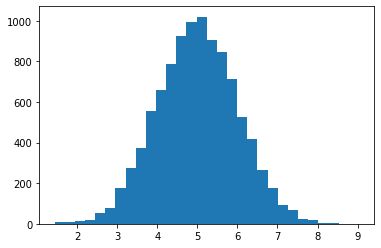

In [ ]:
import numpy as np
import pandas as pd
import numpy.linalg as lin
import scipy.stats as st
import scipy.sparse as sp
import matplotlib.pyplot as plt
import dateutil as dt
import datetime as datetime

n = st.norm(5, 1) # возьмем нормальное распределение со средним 5 и gamma = 1
plt.hist(n.rvs(10000), bins=30) #.rvs - сгенерировать сэмпл
plt.show() #ну, очень похоже на нормальное распределение

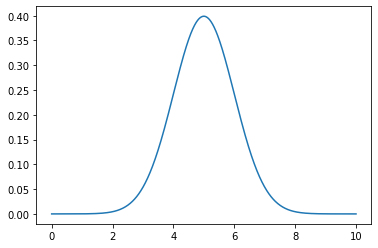

In [ ]:
x = np.linspace(0, 10, 1000)
plt.plot(x, n.pdf(x))
plt.show()

Основное:

* .rvs(size) - сгенерировать выборку нужного размера

* .pdf(val) - значение плотности вероятности в данной точке

* .ppf(perc) - квантили

* .mean, .std, .var - среднее, стандратное отклонение, дисперсия


In [ ]:
n = st.bernoulli(0.3) #распределение Бернулли с p = 0.3 (p - вероятность выпадения 1)
n.rvs(1000).sum() #почти 30% выпадения 1

309

На самом деле, сейчас это может быть не так важно и нужно, но как только вы перейдете к матстату и полному терверу, то сразу понятно станет, как же это удобно (мы с вами потренируемся с этим на семинаре на примере одного датасета)

### Sparse

Так или иначе, у вас может получиться разреженная матрица (то есть это матрица, где очень много нулей и лишь малое число ненулей). Хранить такую матрицу как она есть - это очень грустно с точки зрения памяти (мы храним кучу безполезной информации)

Для этого и придумали sparse модуль. В чем особенность? Давайте хранить вместо самой матрицы ее размеры и места, где находятся ненулевые значения, а потом при взаимодействии это обрабатывать отдельно

Модуль sparse очень хорошо работает с Numpy, так что в этом смысле никаких проблем нет, самое главное - если где-то получается что-то типа sparse матрицы, то в этом поможет именно Scipy

In [ ]:
A = sp.lil_matrix((1000, 1000)) #создаем матрицу
A[0, :100] = np.random.rand(100) # заполним рандомными значениями
A[1, 100:200] = A[0, :100]
A.setdiag(np.random.rand(1000)) #заполним диагонали, чтобы система была решаемой

In [ ]:
A = A.tocsr() # переводим в формат sparse матрицы A.to_array() - вернуть обратно в формат обычной матрицы
b = np.random.rand(1000)
x = sp.linalg.spsolve(A, b) #решаем уравенение
x # получаем такое же решение, как и в случае обычных матриц, но храним меньше данных

# И немного [заданий](https://mariolurig.com/crossword/) на регулярки!

### Задание 1

На вход даётся текст. Необходимо вывести все e-mail адреса, которые в нём встречаются. В общем виде задача достаточно сложная, поэтому у нас будет 3 ограничения:

* две точки внутри адреса не встречаются;
* две собаки внутри адреса не встречаются;
* считаем, что e-mail может быть частью «слова», то есть в boo@ya_ru мы видим адрес boo@ya, а в foo№boo@ya.ru видим boo@ya.ru

### Задание 2

Будем считать аббревиатурой слова только лишь из заглавных букв (как минимум из двух). Если несколько таких слов разделены пробелами, то они
считаются одной аббревиатурой. Найдите все возможные аббревиатуры в тексте

### Задание 3

На вход даётся текст. Выведите слитно первые буквы каждого слова. Буквы необходимо выводить заглавными.
Эту задачу можно решить в одну строчку.

### Задание 4

Довольно распространённая ошибка ошибка — это повтор слова.
Вот в предыдущем предложении такая допущена. Необходимо исправить каждый такой повтор (слово, один или несколько пробельных символов, и снова то же слово).

### Задание 5

На вход даётся текст. Необходимо вывести все e-mail адреса, которые в нём встречаются. При этом e-mail не может быть частью слова, то есть слева и справа от e-mail'а должен быть либо конец строки, либо не-буква и при этом не один из символов '._+-, допустимых в адресе.

### Задание 6 (на BS)

Дан сайт http://mignews.com/mobile (сайт с новостями)

Выведите оттуда все новости в ленты новостей и выведите их, а также найдите все тэги с буквой k и вы ведите их значения)

# В честь конца модуля

![](https://cherepah.ru/wp-content/uploads/f/e/d/fed867b6875cf5a53f93f381c0aba25d.jpeg)

Это ленивец!

![](https://farm4.staticflickr.com/3194/2733424567_d254e0b359_b.jpg)

И это тоже ленивец, но они разные! В чем прикол?

Первый - это трехпалый ленивец, второй - двупалый ленивец, отличаются числом когтей (логично)

Но в чем главный прикол? Так в том, что они вообще не родственники! Они проихошли от совсем разных видов, но эволюция привела их к тому, чтобы быть ленивцами (прям как с крабами).

Ленивцы ленивые, буквально, они спят по 20 часов в сутки, а остальное время едят. За счет того, что они питаются листьями, то у них почти полностью атрофированная мускулатура (на дереве они держатся чисто за счет когтей), плохо видят. Но при этом достаточно неплохо слышат и плавают! (а ходят очень нелепо)

А еще у них 8микамерный желудок (занимает примерно 40% всего тела), что позволяет выжать максимум энергии из листьев. Они живут на деревьях, но при этом не умеют ходить в туалет с воздуха, поэтому раз в неделю им приходится спускаться (вот тогда их обычно и ловят)

Когда конкистадоры прибыли в Латинскую Америку, они пробовали использовать ленивцев в качестве пищи. Но когда они их подстреливали, ленивцы продолжали висеть высоко в деревьях, поэтому на это забили